In [554]:
import pandas as pd
import numpy as np
import re
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [560]:
df = pd.DataFrame(index=range(30, 86))
df.index.name = 'vdot'

In [561]:
# 1,500
t = [8,30,8,15,8,2,7,49,7,37,7,25,7,14,7,4,6,54,6,44,6,35,6,27,6,19,6,11,6,3,
     5,56,5,49,5,42,5,36,5,30,5,24,5,18,5,13,5,7,5,2,4,57,4,53,4,48,4,44,4,39,
     4,35,4,31,4,27,4,24,4,20,4,16,4,13,4,10,4,6,4,3,4,0,3,57,3,54,3,52,3,49,
     3,46,3,44,3,41,3,39,3,37,3,34,3,32,3,30,3,28,3,26,3,24]
df['1.5k'] = [datetime.timedelta(minutes=m, seconds=s) for m, s in zip(t[0::2], t[1::2])]

In [606]:
# 10k
t = [63,46,62,3,60,26,58,54,57,26,56,3,54,44,53,29,52,17,51,9,50,3,49,1,48,1,
     47,4,46,9,45,16,44,25,43,36,42,50,42,4,41,21,40,39,39,59,39,20,38,42,38,6,
     37,31,36,57,36,24,35,52,35,22,34,52,34,23,33,55,33,28,33,1,32,35,32,11,
     31,46,31,23,31,0,30,38,30,16,29,55,29,34,29,14,28,55,28,36,28,17,27,59,27,
     41,27,24,27,7,26,51,26,34,26,19]
df['10k'] = [datetime.timedelta(minutes=m, seconds=s) for m, s in zip(t[0::2], t[1::2])]

In [607]:
# marathon
t = [4,49,17,4,41,57,4,34,59,4,28,22,4,22,3,4,16,3,4,10,19,4,4,50,3,59,35,
     3,54,34,3,49,45,3,45,9,3,40,43,3,36,28,3,32,23,3,28,26,3,24,39,3,21,0,
     3,17,29,3,14,6,3,10,49,3,7,39,3,4,36,3,1,39,2,58,47,2,56,1,2,53,20,2,50,45,
     2,48,14,2,45,47,2,43,25,2,41,8,2,38,54,2,36,44,2,34,38,2,32,35,2,30,36,
     2,28,40,2,26,47,2,24,57,2,23,10,2,21,26,2,19,44,2,18,5,2,16,29,2,14,55,
     2,13,23,2,11,54,2,10,27,2,9,2,2,7,38,2,6,17,2,4,57,2,3,40,2,2,24,2,1,10]
df['marathon'] = [datetime.timedelta(hours=h, minutes=m, seconds=s) for h, m, s in zip(t[0::3], t[1::3], t[2::3])]

In [610]:
y = df['10k'].apply(lambda x: int(x.total_seconds()))

X = pd.DataFrame(data=df.index)
X['vdot_log'] = np.log(X.vdot)
X['vdot_reciprocal'] = 1/X.vdot
X['vdot_pow2'] = X.vdot ** 2
X['vdot_pow3'] = X.vdot ** 3

Text(0.5, 1.0, 'x5 vdot_pow3')

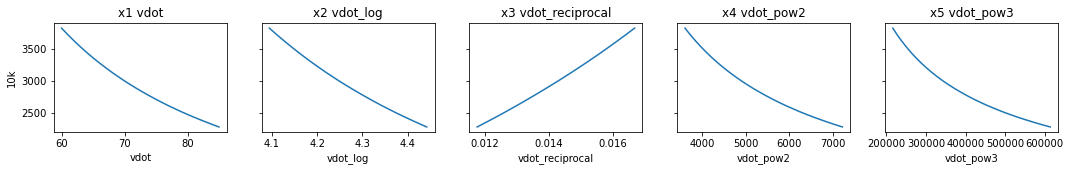

In [611]:
fig, ax = plt.subplots(1, 5, figsize=(18, 2), sharey=True)
sns.lineplot(x=X.vdot, y=y, ax=ax[0]).set_title('x1 vdot')
sns.lineplot(x=X.vdot_log, y=y, ax=ax[1]).set_title('x2 vdot_log')
sns.lineplot(x=X.vdot_reciprocal, y=y, ax=ax[2]).set_title('x3 vdot_reciprocal')
sns.lineplot(x=X.vdot_pow2, y=y, ax=ax[3]).set_title('x4 vdot_pow2')
sns.lineplot(x=X.vdot_pow3, y=y, ax=ax[4]).set_title('x5 vdot_pow3')

In [612]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
clf.fit(X, y)

print(clf.score(X, y))
print(np.round((clf.predict(X)), 0) - y.values)
print(f"np.array([{clf.intercept_}, {clf.coef_[0]}, {clf.coef_[1]}, {clf.coef_[2]}, {clf.coef_[3]}, {clf.coef_[4]}])")

0.9999998186589183
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
np.array([11045.008738808692, 48.69849842830903, -2919.2894591605072, 42237.01880476229, -0.18713464363791843, 0.0003564040634955745])


### weights and methods

In [613]:
metadata = {
    'e_pace': {
        'distance': 1.0,
        'weights': None,
    },
    't_pace': {
        'distance': 1.0,
        'weights': None,
    },
    'i_pace': {
        'distance': 1.0,
        'weights': None,
    },
    'r_pace': {
        'distance': 1.0,
        'weights': None,
    },
    '1.5k': {
        'distance': 1.5,
        'weights': np.array([1182.085091699069, 6.367170440963579, -322.778681874542, 7865.746434686376, -0.03397766949704373, 0.00011018322157951843]),
    },
    '1 mile': {
        'distance': 1.60934,
        'weights': None,
    },
    '3k': {
        'distance': 3.0,
        'weights': None,
    },
    '2 mile': {
        'distance': 3.21869,
        'weights': None,
    },
    '5k': {
        'distance': 5.0,
        'weights': None,
    },
    '10k': {
        'distance': 10.0,
        'weights': np.array([11045.008738808692, 48.69849842830903, -2919.2894591605072, 42237.01880476229, -0.18713464363791843, 0.0003564040634955745]),
    },
    'half marathon': {
        'distance': 21.0975,
        'weights': None,
    },
    'marathon': {
        'distance': 42.195,
        'weights': np.array([60636.22986513261, 246.74130046555726, -15730.318846607715, 109197.36142110199, -0.9739181072484939, 0.002111978999892017]),
    }
}

def get_time(vdot, race):
    X = np.array([1, vdot, np.log(vdot), 1/vdot, vdot**2, vdot**3])
    w = metadata[race]['weights']
    seconds = np.round(X @ w,)
    return datetime.timedelta(seconds=seconds)

def calculate_pace(time: datetime.timedelta, distance: float) -> datetime.timedelta:
    return time / distance

def calculate_time(distance: float, pace: datetime.timedelta) -> datetime.timedelta:
    return distance * pace

def calculate_distance(time: datetime.timedelta, pace: datetime.timedelta) -> float:
    return np.round(time / pace, 5)

def convert_pace_km_to_miles(pace: datetime.timedelta) -> datetime.timedelta:
    return pace / 0.621371

def convert_pace_miles_to_km(pace: datetime.timedelta) -> datetime.timedelta:
    return pace * 0.621371

def format_time(td: datetime.timedelta, strip: bool=True):
    td = datetime.timedelta(seconds=td.seconds).__str__()
    return re.search(pattern=r'[1-9].*', string=td).group() if strip else td

In [617]:
vdot = 65
race = ['marathon', '1.5k', '10k'][2]
distance = metadata[race]['distance']
time = get_time(vdot, race)
print(f'vdot: {vdot} \nrace: {race} \ndistance: {distance} \ntime: {format_time(time)}')

pace = calculate_pace(time, distance)
pace_mi = convert_pace_km_to_miles(pace)
time = calculate_time(distance, pace)
distance = calculate_distance(time, pace)
print(f'\npace (km): {format_time(pace)} \npace (mi): {format_time(pace_mi)} \ntime: {format_time(time)} \ndistance: {distance}')

vdot: 65 
race: 10k 
distance: 10.0 
time: 33:01

pace (km): 3:18 
pace (mi): 5:18 
time: 33:01 
distance: 10.0


In [618]:
eval = pd.DataFrame(index=df.index)
for race in df.columns:
    eval[race + '_y'] = df[race].apply(lambda x: int(x.total_seconds()))
    eval[race + '_y_pred'] = [int(get_time(vdot=i, race=race).total_seconds()) for i in range(30, 86)]
    eval[race + '_delta'] = eval[race + '_y_pred'] - eval[race + '_y']
eval


,1.5k_y,1.5k_y_pred,1.5k_delta,10k_y,10k_y_pred,10k_delta,marathon_y,marathon_y_pred,marathon_delta
vdot,,,,,,,,,
30,510,510,0,3826,3826,0,17357,17357,0
31,495,495,0,3723,3723,0,16917,16917,0
32,482,482,0,3626,3626,0,16499,16499,0
33,469,469,0,3534,3534,0,16102,16102,0
34,457,457,0,3446,3446,0,15723,15724,1
35,445,445,0,3363,3363,0,15363,15363,0
36,434,434,0,3284,3284,0,15019,15019,0
37,424,424,0,3209,3209,0,14690,14690,0
38,414,414,0,3137,3137,0,14375,14375,0
